In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import the data 
data = pd.read_csv('../data/jma_nitrate.csv')
data.columns

data = data[data['nitrate']>0]

# grab the data you are interested in for your model
y = data.nitrate
X = data[['density', 'depth', 'sal']]

r2 = 0.9157187497149234
r2 = 0.9196091761173191
MSE = 19.138683816531973


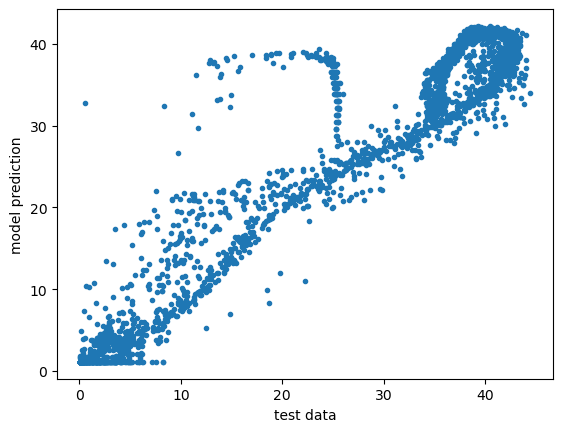

In [6]:
from sklearn import neural_network
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Create linear regression object
regr = neural_network.MLPRegressor(hidden_layer_sizes=(3, 5),
        learning_rate_init=0.01,
        random_state=0,)

# Scale the data
# subtract the mean and divide by SD
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

# Train the model using the training sets
regr.fit(standardized_X, y_train)

# Make predictions using the testing set
y_pred = regr.predict(standardized_X_test)

print('r2 =', r2_score(y_train, regr.predict(standardized_X)))
print('r2 =', r2_score(y_test, y_pred))
print('MSE =',mean_squared_error(y_test, y_pred))

plt.plot(y_test, y_pred, '.')
plt.xlabel('test data')
plt.ylabel('model prediction')

plt.show()

r2 = 0.9928390269756789
r2 = 0.9908944669579743
MSE = 2.167758824398074


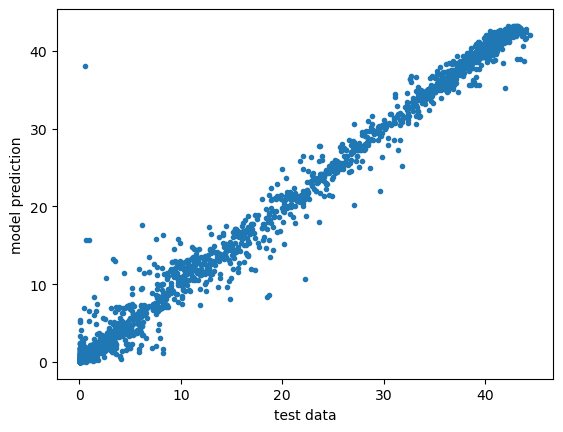

In [7]:

from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Create linear regression object
knregr = neighbors.KNeighborsRegressor(n_neighbors=10)

# Scale the data
# subtract the mean and divide by SD
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

# Train the model using the training sets
knregr.fit(standardized_X, y_train)

# Make predictions using the testing set
y_pred = knregr.predict(standardized_X_test)

print('r2 =', r2_score(y_train, knregr.predict(standardized_X)))
print('r2 =', r2_score(y_test, y_pred))
print('MSE =',mean_squared_error(y_test, y_pred))

plt.plot(y_test, y_pred, '.')
plt.xlabel('test data')
plt.ylabel('model prediction')

plt.show()